In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [135]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [136]:
data = pd.read_csv('/content/drive/MyDrive/emotion_data/emotions.csv')
data.head()

# mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  mean_d_1_a  \
0        4.62      30.3    -356.0      15.6      26.3       1.070       0.411   
1       28.80      33.1      32.0      25.8      22.8       6.550       1.680   
2        8.90      29.4    -416.0      16.7      23.7      79.900       3.360   
3       14.90      31.6    -143.0      19.8      24.3      -0.584      -0.284   
4       28.30      31.3      45.2      27.3      24.5      34.800      -5.790   

   mean_d_2_a  mean_d_3_a  mean_d_4_a  mean_d_0_a2  mean_d_1_a2  mean_d_2_a2  \
0      -15.70        2.06        3.15         2.15         29.5       -353.0   
1        2.88        3.83       -4.82        25.60         32.8         29.6   
2       90.20       89.90        2.03         7.75         30.1       -441.0   
3        8.82        2.30       -1.97        17.30         32.0       -148.0   
4        3.06       41.40        5.52        26.10         34.3         43.7   

   mean_d_3_a2  mean_d_4_a2  mean_d_5_a  mean_d_6_a  mean_d_7_a  mean_d_8_a  \
0        14.40         21.5        5.98        30.7      -343.0        14.7   
1        21.50         17.4       25.50        31.7        31.5        26.2   
2         9.89         25.3      -68.90        25.3      -481.0       -65.4   
3        20.40         22.8       13.20        31.5      -147.0        16.9   
4        23.70         20.6       -3.87        34.1        43.7       -10.0   

   mean_d_9_a  mean_d_10_a  mean_d_11_a  mean_d_12_a  mean_d_13_a  \
0        27.9         3.17         32.2       -368.0         15.9   
1        32.9        31.80         33.1         33.2         28.5   
2        20.0        79.80         31.0       -408.0         91.9   
3        27.7        15.70         30.7       -142.0         20.7   
4        22.9        59.40         26.7         60.3         64.7   

   mean_d_14_a  mean_d_15_a  mean_d_16_a  mean_d_17_a  mean_d_18_a  \
0         36.4         7.08         28.8       -359.0         17.3   
1         26.8        32.40         34.7         33.8         27.0   
2         29.5        18.80         31.1       -335.0         32.2   
3         22.8        13.60         32.2       -135.0         21.2   
4         26.9        32.30         30.1         33.6         31.6   

   mean_d_19_a  mean_d_20_a  mean_d_21_a  mean_d_22_a  mean_d_23_a  \
0         19.6      -3.8300       -1.230    -10.80000       -0.363   
1         14.2       0.0342        1.100     -1.87000       -4.690   
2         19.9      76.6000        4.850     39.90000       75.300   
3         23.8       4.1500        0.556     -0.35400        3.460   
4         27.7      30.0000        0.276     -0.00677       33.700   

   mean_d_24_a  mean_d_25_a  mean_d_26_a  mean_d_27_a  mean_d_28_a  \
0        -6.41        -1.03       -2.780        14.60       -1.540   
1       -15.40        -6.22       -0.328        -3.53       -6.980   
2         5.27       -72.00       -0.843       -33.00      -82.000   
3        -4.96         1.63        1.330        -5.83       -0.298   
4        -2.36       -33.30        7.640       -16.60      -41.100   

   mean_d_29_a  mean_d_30_a  mean_d_31_a  mean_d_32_a  mean_d_33_a  \
0   -14.900000        -4.94        0.664         5.82       -2.920   
1    -9.370000        -6.85       -1.890        -4.13       -5.460   
2    -4.200000       -11.00       -0.972      -106.00      -22.300   
3     0.000777         3.71       -0.176       -12.10       -0.784   
4    -6.290000        -6.21        4.260        10.10       -7.930   

   mean_d_34_a  mean_d_35_a  mean_d_36_a  mean_d_37_a  mean_d_38_a  \
0         1.90         2.80       -1.550        25.50        -1.18   
1         3.20        -6.25       -1.430        -1.65        -2.28   
2         5.36      -149.00       -5.690       -72.90      -157.00   
3        -1.07        -2.52        0.771        -5.48        -3.75   
4        -7.14       -63.30        7.360       -16.60       -74.80   

   mean_d_39_a  mean_d_40_a  mean_d_41_a

In [137]:
data.shape

(2132, 2549)

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132 entries, 0 to 2131
Columns: 2549 entries, # mean_0_a to label
dtypes: float64(2548), object(1)
memory usage: 41.5+ MB


In [139]:
data.describe()

# mean_0_a     mean_1_a     mean_2_a     mean_3_a     mean_4_a  \
count  2132.000000  2132.000000  2132.000000  2132.000000  2132.000000   
mean     15.256914    27.012462  -104.975629    13.605898    24.150483   
std      15.284621     9.265141   206.271960    16.874676    14.187340   
min     -61.300000  -114.000000  -970.000000  -137.000000  -217.000000   
25%       6.577500    26.075000  -195.000000     4.857500    23.600000   
50%      14.100000    30.000000    14.950000    15.400000    25.200000   
75%      27.700000    31.400000    29.600000    26.500000    26.800000   
max     304.000000    42.300000   661.000000   206.000000   213.000000   

        mean_d_0_a   mean_d_1_a   mean_d_2_a   mean_d_3_a   mean_d_4_a  \
count  2132.000000  2132.000000  2132.000000  2132.000000  2132.000000   
mean      0.025378     0.052282     0.301655     0.036793     0.083567   
std      17.981796     8.509174    68.098894    17.010031    18.935378   
min    -218.000000  -255.000000 -1360.000000  -203.000000  -553.000000   
25%      -3.105000    -1.340000    -4.002500    -2.905000    -2.622500   
50%      -0.044600     0.132000     0.957500    -0.099750     0.146500   
75%       2.920000     1.540000     6.735000     2.535000     2.870000   
max     402.000000   257.000000  1150.000000   349.000000   444.000000   

       mean_d_0_a2  mean_d_1_a2  mean_d_2_a2  mean_d_3_a2  mean_d_4_a2  \
count  2132.000000  2132.000000  2132.000000  2132.000000  2132.000000   
mean     14.434887    26.908907  -105.588740    12.887584    23.926767   
std      19.515474    11.879437   211.103804    22.367222    22.135017   
min    -190.000000  -310.000000  -970.000000  -253.000000  -750.000000   
25%       5.590000    25.500000  -197.000000     3.947500    21.700000   
50%      14.100000    29.800000    12.950000    15.400000    25.200000   
75%      27.600000    31.700000    29.200000    26.200000    28.325000   
max     191.000000   116.000000   991.000000   245.000000   250.000000   

        mean_d_5_a   mean_d_6_a   mean_d_7_a   mean_d_8_a   mean_d_9_a  \
count  2132.000000  2132.000000  2132.000000  2132.000000  2132.000000   
mean     16.033058    27.060702  -104.679376    14.267053    24.283368   
std      24.429661    13.780414   211.082473    23.307269    16.597016   
min    -125.000000  -368.000000  -970.000000  -131.000000  -140.000000   
25%       6.490000    25.300000  -194.000000     4.300000    21.800000   
50%      14.400000    29.700000    13.300000    16.000000    25.200000   
75%      27.700000    31.600000    28.925000    26.400000    28.400000   
max     629.000000   335.000000   999.000000   444.000000   476.000000   

       mean_d_10_a  mean_d_11_a  mean_d_12_a  mean_d_13_a  mean_d_14_a  \
count  2132.000000  2132.000000  2132.000000  2132.000000  2132.000000   
mean     14.467447    26.959896  -105.381444    12.933635    24.003451   
std      19.511804    11.860676   211.000691    22.357290    21.953792   
min    -191.000000  -312.000000  -970.000000  -254.000000  -754.000000   
25%       5.630000    25.500000  -196.000000     3.970000    21.800000   
50%      14.100000    29.800000    12.900000    15.500000    25.100000   
75%      27.600000    31.700000    29.200000    26.200000    28.300000   
max     190.000000   118.000000  1000.000000   245.000000   251.000000   

       mean_d_15_a  mean_d_16_a  mean_d_17_a  mean_d_18_a  mean_d_19_a  \
count  2132.000000  2132.000000  2132.000000  2132.000000  2132.000000   
mean     16.049431    27.114985  -104.290668    14.294105    24.373668   
std      24.443949    13.737191   210.671349    23.324362    16.212550   
min    -125.000000  -368.000000  -973.000000  -131.000000  -137.000000   
25%       6.520000    25.300000  -193.250000     4.440000    21.800000   
50%      14.500000    29.700000    13.300000    16.100000    25.200000   
75%      27.700000    31.600000    29.000000    26.400000    28.400000   
max     629.000000   336.000000  1000.000000   444.000000   476.000000   

      

# Preprocessing

**Fast Fourier Transform (FFT)**

This method employs mathematical means or tools to EEG data analysis. Characteristics of the acquired EEG signal to be analyzed are computed by power spectral density (PSD) estimation in order to selectively represent the EEG samples signal. However, four frequency bands contain the major characteristic waveforms of EEG spectrum.

This method is used to extract features from the raw EEG readings functions based on time into functions depending on frequency.

In [140]:
#Seprarting Positive,Neagtive and Neutral dataframes for plortting
pos = data.loc[data["label"]=="POSITIVE"]
sample_pos = pos.loc[2, 'fft_0_b':'fft_749_b']
neg = data.loc[data["label"]=="NEGATIVE"]
sample_neg = neg.loc[0, 'fft_0_b':'fft_749_b']
neu = data.loc[data["label"]=="NEUTRAL"]
sample_neu = neu.loc[1, 'fft_0_b':'fft_749_b']

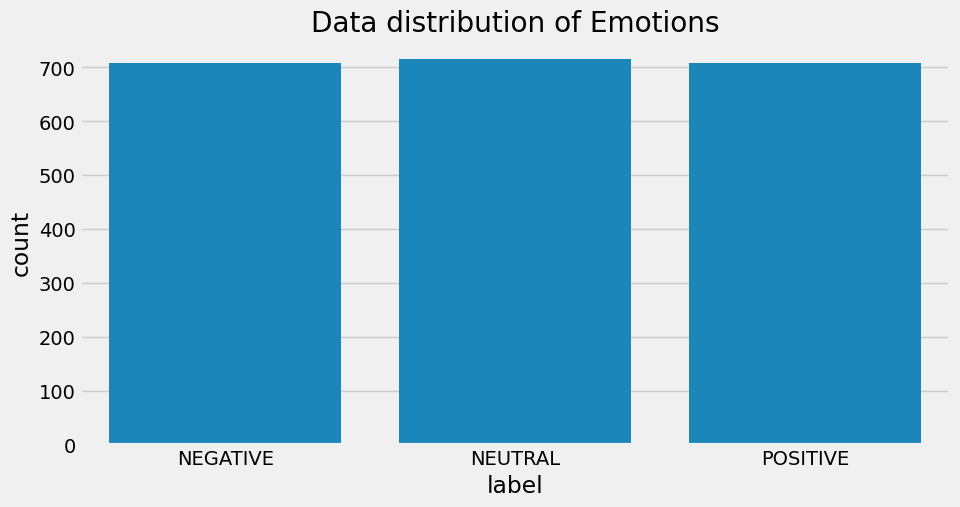

In [141]:
plt.figure(figsize=(10,5))
plt.title("Data distribution of Emotions")
plt.style.use('fivethirtyeight')
sns.countplot(x='label', data=data)
plt.show()

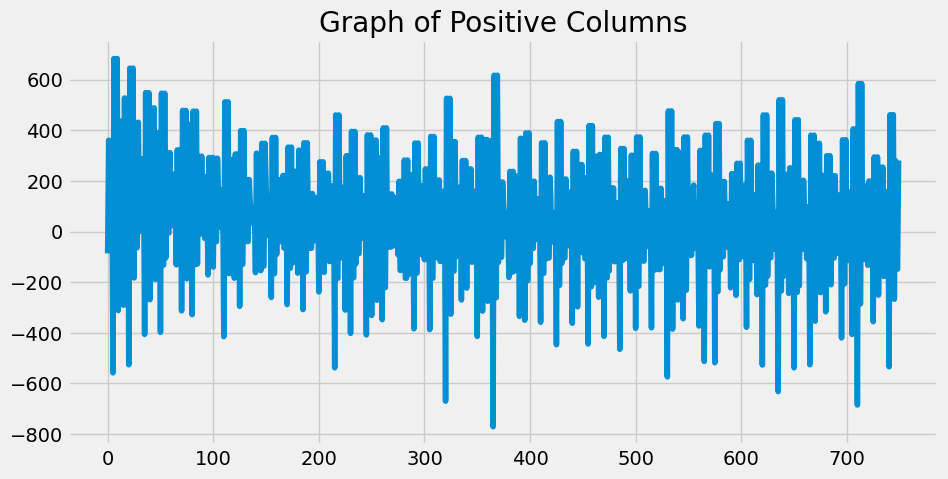

In [142]:
plt.figure(figsize=(10, 5))
plt.plot(range(len(sample_pos)), sample_pos)
plt.title("Graph of Positive Columns")
plt.show()

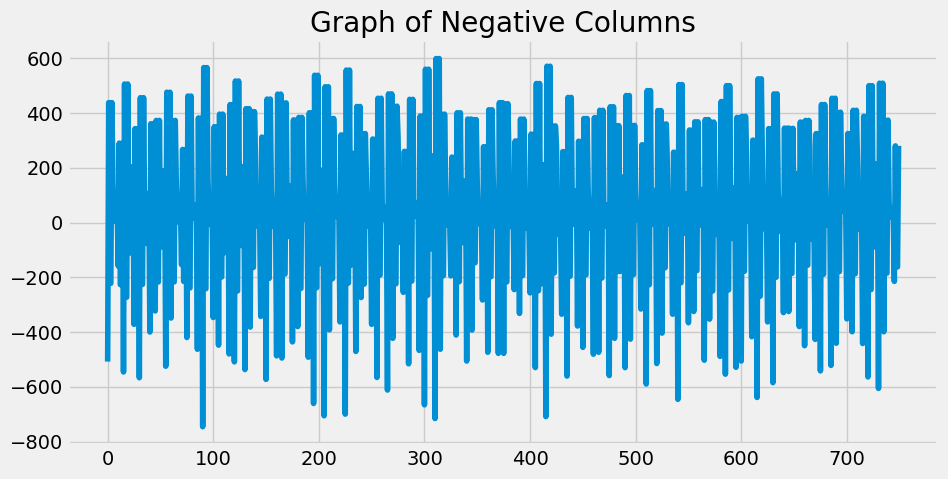

In [143]:
plt.figure(figsize=(10, 5))
plt.plot(range(len(sample_neg)), sample_neg)
plt.title("Graph of Negative Columns")
plt.show()

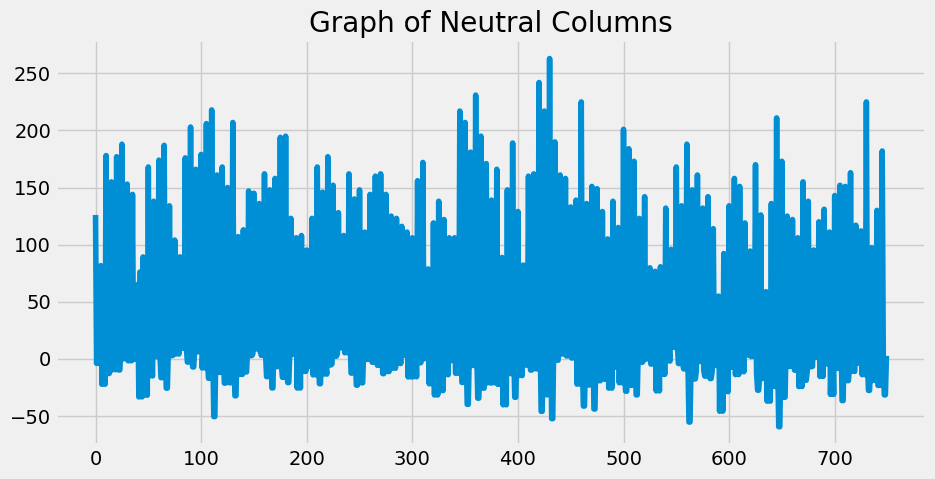

In [144]:
plt.figure(figsize=(10, 5))
plt.plot(range(len(sample_neu)), sample_neu)
plt.title("Graph of Neutral Columns")
plt.show()

In [145]:
label = LabelEncoder()
data1['label']=label.fit_transform(data['label'])

# Modeling

In [146]:
data2 = data1.copy()

In [147]:
data2['label'].unique()

array([0, 1, 2])

In [148]:
data2['label'].value_counts()

label
1    716
0    708
2    708
Name: count, dtype: int64

In [149]:
data2.head()

# mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  mean_d_1_a  \
0        4.62      30.3    -356.0      15.6      26.3       1.070       0.411   
1       28.80      33.1      32.0      25.8      22.8       6.550       1.680   
2        8.90      29.4    -416.0      16.7      23.7      79.900       3.360   
3       14.90      31.6    -143.0      19.8      24.3      -0.584      -0.284   
4       28.30      31.3      45.2      27.3      24.5      34.800      -5.790   

   mean_d_2_a  mean_d_3_a  mean_d_4_a  mean_d_0_a2  mean_d_1_a2  mean_d_2_a2  \
0      -15.70        2.06        3.15         2.15         29.5       -353.0   
1        2.88        3.83       -4.82        25.60         32.8         29.6   
2       90.20       89.90        2.03         7.75         30.1       -441.0   
3        8.82        2.30       -1.97        17.30         32.0       -148.0   
4        3.06       41.40        5.52        26.10         34.3         43.7   

   mean_d_3_a2  mean_d_4_a2  mean_d_5_a  mean_d_6_a  mean_d_7_a  mean_d_8_a  \
0        14.40         21.5        5.98        30.7      -343.0        14.7   
1        21.50         17.4       25.50        31.7        31.5        26.2   
2         9.89         25.3      -68.90        25.3      -481.0       -65.4   
3        20.40         22.8       13.20        31.5      -147.0        16.9   
4        23.70         20.6       -3.87        34.1        43.7       -10.0   

   mean_d_9_a  mean_d_10_a  mean_d_11_a  mean_d_12_a  mean_d_13_a  \
0        27.9         3.17         32.2       -368.0         15.9   
1        32.9        31.80         33.1         33.2         28.5   
2        20.0        79.80         31.0       -408.0         91.9   
3        27.7        15.70         30.7       -142.0         20.7   
4        22.9        59.40         26.7         60.3         64.7   

   mean_d_14_a  mean_d_15_a  mean_d_16_a  mean_d_17_a  mean_d_18_a  \
0         36.4         7.08         28.8       -359.0         17.3   
1         26.8        32.40         34.7         33.8         27.0   
2         29.5        18.80         31.1       -335.0         32.2   
3         22.8        13.60         32.2       -135.0         21.2   
4         26.9        32.30         30.1         33.6         31.6   

   mean_d_19_a  mean_d_20_a  mean_d_21_a  mean_d_22_a  mean_d_23_a  \
0         19.6      -3.8300       -1.230    -10.80000       -0.363   
1         14.2       0.0342        1.100     -1.87000       -4.690   
2         19.9      76.6000        4.850     39.90000       75.300   
3         23.8       4.1500        0.556     -0.35400        3.460   
4         27.7      30.0000        0.276     -0.00677       33.700   

   mean_d_24_a  mean_d_25_a  mean_d_26_a  mean_d_27_a  mean_d_28_a  \
0        -6.41        -1.03       -2.780        14.60       -1.540   
1       -15.40        -6.22       -0.328        -3.53       -6.980   
2         5.27       -72.00       -0.843       -33.00      -82.000   
3        -4.96         1.63        1.330        -5.83       -0.298   
4        -2.36       -33.30        7.640       -16.60      -41.100   

   mean_d_29_a  mean_d_30_a  mean_d_31_a  mean_d_32_a  mean_d_33_a  \
0   -14.900000        -4.94        0.664         5.82       -2.920   
1    -9.370000        -6.85       -1.890        -4.13       -5.460   
2    -4.200000       -11.00       -0.972      -106.00      -22.300   
3     0.000777         3.71       -0.176       -12.10       -0.784   
4    -6.290000        -6.21        4.260        10.10       -7.930   

   mean_d_34_a  mean_d_35_a  mean_d_36_a  mean_d_37_a  mean_d_38_a  \
0         1.90         2.80       -1.550        25.50        -1.18   
1         3.20        -6.25       -1.430        -1.65        -2.28   
2         5.36      -149.00       -5.690       -72.90      -157.00   
3        -1.07        -2.52        0.771        -5.48        -3.75   
4        -7.14       -63.30        7.360       -16.60       -74.80   

   mean_d_39_a  mean_d_40_a  mean_d_41_a

In [150]:
X = data2.drop('label', axis = 1)
y = data2['label']

In [151]:
X_train, X_test, y_train, y_test = train_test_split(data2, labels, test_size=0.2, random_state=42)

In [152]:
X_train.shape, X_test.shape

((1705, 2549), (427, 2549))

In [153]:
X_test.shape

(427, 2549)

In [154]:
y_train.shape, y_test.shape

((1705,), (427,))

In [155]:
X_train.dtypes

# mean_0_a    float64
mean_1_a      float64
mean_2_a      float64
mean_3_a      float64
mean_4_a      float64
               ...   
fft_746_b     float64
fft_747_b     float64
fft_748_b     float64
fft_749_b     float64
label           int64
Length: 2549, dtype: object

In [156]:
X_train.isnull().sum()

# mean_0_a    0
mean_1_a      0
mean_2_a      0
mean_3_a      0
mean_4_a      0
             ..
fft_746_b     0
fft_747_b     0
fft_748_b     0
fft_749_b     0
label         0
Length: 2549, dtype: int64

In [157]:
X_test.isnull().sum()

# mean_0_a    0
mean_1_a      0
mean_2_a      0
mean_3_a      0
mean_4_a      0
             ..
fft_746_b     0
fft_747_b     0
fft_748_b     0
fft_749_b     0
label         0
Length: 2549, dtype: int64

Feature Scaling

In [158]:
cols = X_train.columns

In [159]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [160]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [161]:
X_train.head()

# mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a mean_d_0_a mean_d_1_a  \
0  -1.137352 -0.276843  0.518753 -1.398557 -0.360498  -0.150796  -0.024019   
1  -0.575909 -1.105170  0.617301 -0.785267 -0.076375  -0.095614  -0.070087   
2  -0.156903  0.357849 -0.801522 -0.034271 -0.029021   0.045464  -0.216132   
3  -1.772887 -0.061693 -3.727784 -0.296098  0.038627   0.397380  -0.177473   
4   0.002779 -0.061693 -0.158816  0.070228  0.349809  -0.044545   0.008089   

  mean_d_2_a mean_d_3_a mean_d_4_a mean_d_0_a2 mean_d_1_a2 mean_d_2_a2  \
0   0.096663   0.054617   0.303827   -0.900000   -0.164613    0.488784   
1  -0.028866   0.002775   0.021940   -0.520681   -0.886191    0.616761   
2   0.384078   0.130970  -0.095784   -0.208864    0.220775   -0.808279   
3  -0.056039  -0.039883  -0.180696   -0.932743    0.171576   -3.556436   
4   0.237276   0.006094   0.098025    0.103457   -0.107215   -0.260553   

  mean_d_3_a2 mean_d_4_a2 mean_d_5_a mean_d_6_a mean_d_7_a mean_d_8_a  \
0   -1.170554   -0.525747  -0.573251  -0.191252   0.491540  -0.910866   
1   -0.517981    0.065405  -0.227098  -0.612738   0.596964  -0.618519   
2   -0.022561    0.065405  -0.065380   0.400188  -0.877899  -0.125585   
3   -0.057349    0.269394  -1.705662  -0.109674  -3.701600  -0.327725   
4   -0.005167    0.227764  -0.038427   0.005895  -0.129334   0.094931   

  mean_d_9_a mean_d_10_a mean_d_11_a mean_d_12_a mean_d_13_a mean_d_14_a  \
0  -0.253773   -0.989153   -0.141774    0.490396   -1.071120    0.069449   
1  -0.236718   -0.548568   -0.932852    0.603535   -0.515655   -0.084134   
2  -0.032067    0.016104    0.326415   -0.696098    0.041548   -0.118263   
3  -0.077545   -0.752031    0.003526   -3.613156   -0.101882    0.086514   
4   0.166900   -0.099443   -0.036835   -0.188577    0.024162    0.252896   

  mean_d_15_a mean_d_16_a mean_d_17_a mean_d_18_a mean_d_19_a mean_d_20_a  \
0   -0.742553   -0.240382    0.555122   -0.952774   -0.344625   -0.105964   
1   -0.353989   -0.651204    0.593810   -0.635126    0.009783   -0.157219   
2   -0.171739    0.040346   -0.738771    0.009385   -0.013844   -0.087100   
3   -1.288121   -0.192453   -3.690510   -0.357211   -0.267836    0.916638   
4    0.049170   -0.034971   -0.046211    0.080937    0.381912    0.111868   

  mean_d_21_a mean_d_22_a mean_d_23_a mean_d_24_a mean_d_25_a mean_d_26_a  \
0    0.049051   -0.019715   -0.172389   -0.401109    0.072868   -0.022160   
1   -0.108058    0.061369    0.119552    0.281584    0.023348    0.059838   
2   -0.179972    0.264341    0.097934    0.105851   -0.177729   -0.102795   
3    0.216135    0.602337    0.245937    0.389689   -0.141758    0.165987   
4   -0.083120   -0.471193   -0.092937    0.125103    0.164794   -0.064604   

  mean_d_27_a mean_d_28_a mean_d_29_a mean_d_30_a mean_d_31_a mean_d_32_a  \
0   -0.009251   -0.099121   -0.446748    0.034868    0.092711   -0.142007   
1    0.027486   -0.001816    0.109824   -0.049502   -0.078085    0.054199   
2   -0.276838   -0.059196    0.137402    0.006139    0.126153   -0.154504   
3    0.186521    0.041973    0.138342    0.516722    0.296352    0.278732   
4   -0.172553   -0.028022   -0.016125    0.029777   -0.047628   -0.472140   

  mean_d_33_a mean_d_34_a mean_d_35_a mean_d_36_a mean_d_37_a mean_d_38_a  \
0   -0.157240   -0.261996    0.161834   -0.154395    0.005903    0.088717   
1    0.115307    0.053685    0.168573    0.361434   -0.020327   -0.124991   
2   -0.024051    0.070260   -0.067400    0.252184   -0.654820   -0.153942   
3    0.258295    0.426137   -0.987873   -0.227689   -0.317650   -0.216036   
4   -0.075585   -0.038169    0.033115    0.087340    0.210244    0.070432   

  mean_d_39_a mean_d_40_a mean_d_41_a mean_d_42_a mean_d_43_a mean_d_44_a  \
0   -0.263157    0.144562    0.033399   -0.158154    0.012434    0.073640   
1   -0.094972    0.112236    0.026433    0.021499   -0.002117   -0.233761   
2    0.096069    0.095705    0.245523   -0.377983   -0.123512   -0.017985   
3   -0.149740   -0.427756    0.0

#KNN

In [162]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [163]:
y_pred = knn.predict(X_test)
y_pred

array([1, 1, 0, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 2, 2, 1, 1,
       0, 0, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 2, 1,
       2, 1, 1, 2, 2, 0, 0, 0, 1, 0, 2, 0, 0, 1, 1, 1, 0, 1, 0, 1, 2, 0,
       0, 0, 1, 2, 2, 1, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 2, 2, 1, 2, 1, 2, 0, 0, 2, 2,
       0, 0, 2, 1, 1, 0, 0, 2, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       2, 1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 1, 2, 0,
       0, 1, 0, 2, 1, 1, 2, 0, 1, 2, 2, 2, 2, 1, 1, 1, 0, 1, 2, 1, 0, 0,
       2, 1, 0, 1, 1, 1, 2, 2, 0, 1, 0, 1, 0, 1, 1, 2, 2, 0, 0, 1, 0, 1,
       2, 0, 1, 2, 0, 1, 0, 0, 0, 2, 2, 1, 2, 1, 1, 0, 0, 1, 1, 0, 2, 0,
       0, 2, 0, 1, 1, 1, 0, 1, 2, 1, 2, 1, 2, 2, 0, 0, 0, 0, 2, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 0, 1,
       2, 2, 2, 2, 0, 1, 2, 0, 0, 1, 1, 2, 0, 1, 1, 0, 1, 0, 0, 1, 0, 2,
       2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 2, 2, 2, 1, 0,

In [164]:
knn.predict_proba(X_test)[:,0]

array([0.        , 0.        , 1.        , 0.66666667, 0.        ,
       0.        , 1.        , 0.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.        , 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 1.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       1.        , 1.        , 0.        , 1.        , 0.        ,
       1.        , 1.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.        ,
       1.        , 1.        , 1.        , 0.        , 0.        ,
       0.33333333, 0.        , 0.        , 1.        , 1.     

In [165]:
knn.predict_proba(X_test)[:,1]

array([1.        , 1.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.33333333, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.        , 1.        , 1.        , 0.        ,
       0.        , 0.66666667, 0.        , 1.        , 0.        ,
       1.        , 1.        , 0.        , 0.33333333, 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 1.        , 1.        ,
       0.        , 1.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.     

Accuracy

In [166]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9415


Model Accuracy 94.15 %

In [167]:
y_pred_train = knn.predict(X_train)

In [168]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9713


Checking Overfitting or Underfitting

In [169]:
print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.9713
Test set score: 0.9415


In [170]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test, y_pred)
cm

array([[142,   0,   1],
       [  0, 145,   3],
       [ 16,   5, 115]])

<Axes: >

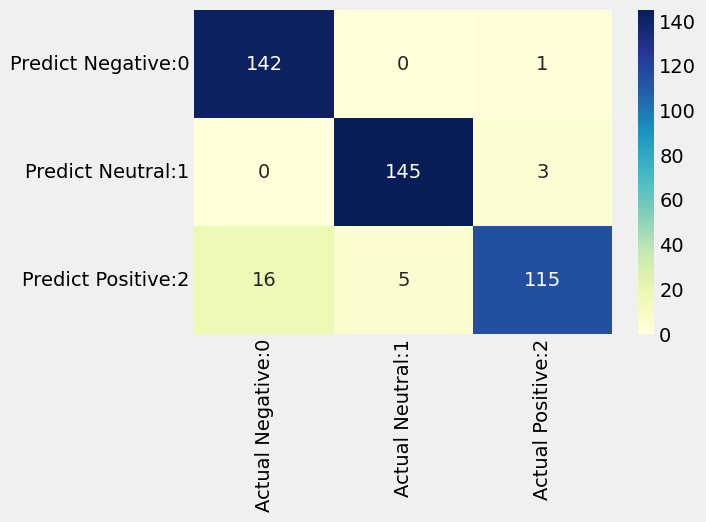

In [171]:
plt.figure(figsize=(6,4))

cm_matrix = pd.DataFrame(data= cm, columns=['Actual Negative:0', 'Actual Neutral:1', 'Actual Positive:2'],
                                 index=['Predict Negative:0', 'Predict Neutral:1', 'Predict Positive:2'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [172]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       143
           1       0.97      0.98      0.97       148
           2       0.97      0.85      0.90       136

    accuracy                           0.94       427
   macro avg       0.94      0.94      0.94       427
weighted avg       0.94      0.94      0.94       427



#SVM

In [173]:
# Apply SVM Model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC()
svc.fit(X_train, y_train)
y_pred=svc.predict(X_test)
print('Model accuracy : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy : 0.9625


<Axes: >

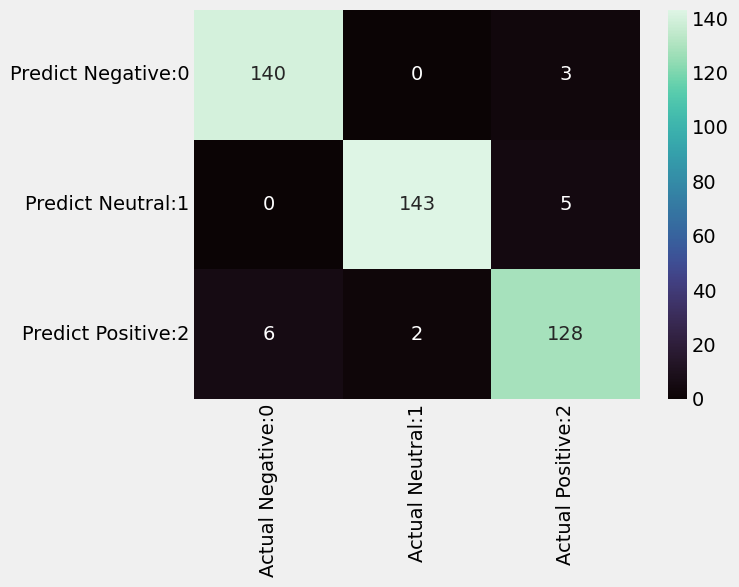

In [174]:
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data= cm, columns=['Actual Negative:0', 'Actual Neutral:1', 'Actual Positive:2'],
                                 index=['Predict Negative:0', 'Predict Neutral:1', 'Predict Positive:2'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [175]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       143
           1       0.99      0.97      0.98       148
           2       0.94      0.94      0.94       136

    accuracy                           0.96       427
   macro avg       0.96      0.96      0.96       427
weighted avg       0.96      0.96      0.96       427



#Decision Tree

In [188]:
data2.head()

# mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  mean_d_1_a  \
0        4.62      30.3    -356.0      15.6      26.3       1.070       0.411   
1       28.80      33.1      32.0      25.8      22.8       6.550       1.680   
2        8.90      29.4    -416.0      16.7      23.7      79.900       3.360   
3       14.90      31.6    -143.0      19.8      24.3      -0.584      -0.284   
4       28.30      31.3      45.2      27.3      24.5      34.800      -5.790   

   mean_d_2_a  mean_d_3_a  mean_d_4_a  mean_d_0_a2  mean_d_1_a2  mean_d_2_a2  \
0      -15.70        2.06        3.15         2.15         29.5       -353.0   
1        2.88        3.83       -4.82        25.60         32.8         29.6   
2       90.20       89.90        2.03         7.75         30.1       -441.0   
3        8.82        2.30       -1.97        17.30         32.0       -148.0   
4        3.06       41.40        5.52        26.10         34.3         43.7   

   mean_d_3_a2  mean_d_4_a2  mean_d_5_a  mean_d_6_a  mean_d_7_a  mean_d_8_a  \
0        14.40         21.5        5.98        30.7      -343.0        14.7   
1        21.50         17.4       25.50        31.7        31.5        26.2   
2         9.89         25.3      -68.90        25.3      -481.0       -65.4   
3        20.40         22.8       13.20        31.5      -147.0        16.9   
4        23.70         20.6       -3.87        34.1        43.7       -10.0   

   mean_d_9_a  mean_d_10_a  mean_d_11_a  mean_d_12_a  mean_d_13_a  \
0        27.9         3.17         32.2       -368.0         15.9   
1        32.9        31.80         33.1         33.2         28.5   
2        20.0        79.80         31.0       -408.0         91.9   
3        27.7        15.70         30.7       -142.0         20.7   
4        22.9        59.40         26.7         60.3         64.7   

   mean_d_14_a  mean_d_15_a  mean_d_16_a  mean_d_17_a  mean_d_18_a  \
0         36.4         7.08         28.8       -359.0         17.3   
1         26.8        32.40         34.7         33.8         27.0   
2         29.5        18.80         31.1       -335.0         32.2   
3         22.8        13.60         32.2       -135.0         21.2   
4         26.9        32.30         30.1         33.6         31.6   

   mean_d_19_a  mean_d_20_a  mean_d_21_a  mean_d_22_a  mean_d_23_a  \
0         19.6      -3.8300       -1.230    -10.80000       -0.363   
1         14.2       0.0342        1.100     -1.87000       -4.690   
2         19.9      76.6000        4.850     39.90000       75.300   
3         23.8       4.1500        0.556     -0.35400        3.460   
4         27.7      30.0000        0.276     -0.00677       33.700   

   mean_d_24_a  mean_d_25_a  mean_d_26_a  mean_d_27_a  mean_d_28_a  \
0        -6.41        -1.03       -2.780        14.60       -1.540   
1       -15.40        -6.22       -0.328        -3.53       -6.980   
2         5.27       -72.00       -0.843       -33.00      -82.000   
3        -4.96         1.63        1.330        -5.83       -0.298   
4        -2.36       -33.30        7.640       -16.60      -41.100   

   mean_d_29_a  mean_d_30_a  mean_d_31_a  mean_d_32_a  mean_d_33_a  \
0   -14.900000        -4.94        0.664         5.82       -2.920   
1    -9.370000        -6.85       -1.890        -4.13       -5.460   
2    -4.200000       -11.00       -0.972      -106.00      -22.300   
3     0.000777         3.71       -0.176       -12.10       -0.784   
4    -6.290000        -6.21        4.260        10.10       -7.930   

   mean_d_34_a  mean_d_35_a  mean_d_36_a  mean_d_37_a  mean_d_38_a  \
0         1.90         2.80       -1.550        25.50        -1.18   
1         3.20        -6.25       -1.430        -1.65        -2.28   
2         5.36      -149.00       -5.690       -72.90      -157.00   
3        -1.07        -2.52        0.771        -5.48        -3.75   
4        -7.14       -63.30        7.360       -16.60       -74.80   

   mean_d_39_a  mean_d_40_a  mean_d_41_a

In [192]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42)

In [193]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [194]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [198]:
#prediction
y_pred = classifier.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9555


In [200]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[137,   0,   6],
       [  0, 146,   2],
       [ 11,   0, 125]])

<Axes: >

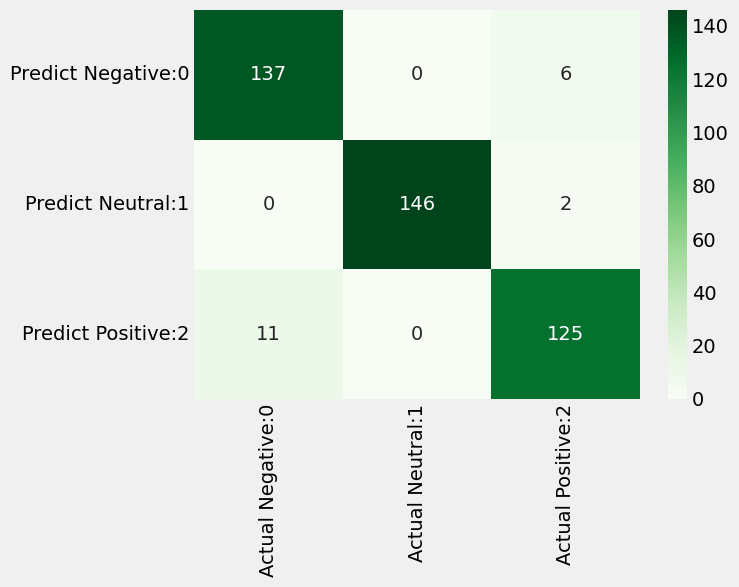

In [201]:
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data= cm, columns=['Actual Negative:0', 'Actual Neutral:1', 'Actual Positive:2'],
                                 index=['Predict Negative:0', 'Predict Neutral:1', 'Predict Positive:2'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Greens')

Decision Tree Classification Report

In [202]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       143
           1       1.00      0.99      0.99       148
           2       0.94      0.92      0.93       136

    accuracy                           0.96       427
   macro avg       0.96      0.95      0.95       427
weighted avg       0.96      0.96      0.96       427



#Random Forest Classifier

In [203]:
data2.head()

# mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  mean_d_1_a  \
0        4.62      30.3    -356.0      15.6      26.3       1.070       0.411   
1       28.80      33.1      32.0      25.8      22.8       6.550       1.680   
2        8.90      29.4    -416.0      16.7      23.7      79.900       3.360   
3       14.90      31.6    -143.0      19.8      24.3      -0.584      -0.284   
4       28.30      31.3      45.2      27.3      24.5      34.800      -5.790   

   mean_d_2_a  mean_d_3_a  mean_d_4_a  mean_d_0_a2  mean_d_1_a2  mean_d_2_a2  \
0      -15.70        2.06        3.15         2.15         29.5       -353.0   
1        2.88        3.83       -4.82        25.60         32.8         29.6   
2       90.20       89.90        2.03         7.75         30.1       -441.0   
3        8.82        2.30       -1.97        17.30         32.0       -148.0   
4        3.06       41.40        5.52        26.10         34.3         43.7   

   mean_d_3_a2  mean_d_4_a2  mean_d_5_a  mean_d_6_a  mean_d_7_a  mean_d_8_a  \
0        14.40         21.5        5.98        30.7      -343.0        14.7   
1        21.50         17.4       25.50        31.7        31.5        26.2   
2         9.89         25.3      -68.90        25.3      -481.0       -65.4   
3        20.40         22.8       13.20        31.5      -147.0        16.9   
4        23.70         20.6       -3.87        34.1        43.7       -10.0   

   mean_d_9_a  mean_d_10_a  mean_d_11_a  mean_d_12_a  mean_d_13_a  \
0        27.9         3.17         32.2       -368.0         15.9   
1        32.9        31.80         33.1         33.2         28.5   
2        20.0        79.80         31.0       -408.0         91.9   
3        27.7        15.70         30.7       -142.0         20.7   
4        22.9        59.40         26.7         60.3         64.7   

   mean_d_14_a  mean_d_15_a  mean_d_16_a  mean_d_17_a  mean_d_18_a  \
0         36.4         7.08         28.8       -359.0         17.3   
1         26.8        32.40         34.7         33.8         27.0   
2         29.5        18.80         31.1       -335.0         32.2   
3         22.8        13.60         32.2       -135.0         21.2   
4         26.9        32.30         30.1         33.6         31.6   

   mean_d_19_a  mean_d_20_a  mean_d_21_a  mean_d_22_a  mean_d_23_a  \
0         19.6      -3.8300       -1.230    -10.80000       -0.363   
1         14.2       0.0342        1.100     -1.87000       -4.690   
2         19.9      76.6000        4.850     39.90000       75.300   
3         23.8       4.1500        0.556     -0.35400        3.460   
4         27.7      30.0000        0.276     -0.00677       33.700   

   mean_d_24_a  mean_d_25_a  mean_d_26_a  mean_d_27_a  mean_d_28_a  \
0        -6.41        -1.03       -2.780        14.60       -1.540   
1       -15.40        -6.22       -0.328        -3.53       -6.980   
2         5.27       -72.00       -0.843       -33.00      -82.000   
3        -4.96         1.63        1.330        -5.83       -0.298   
4        -2.36       -33.30        7.640       -16.60      -41.100   

   mean_d_29_a  mean_d_30_a  mean_d_31_a  mean_d_32_a  mean_d_33_a  \
0   -14.900000        -4.94        0.664         5.82       -2.920   
1    -9.370000        -6.85       -1.890        -4.13       -5.460   
2    -4.200000       -11.00       -0.972      -106.00      -22.300   
3     0.000777         3.71       -0.176       -12.10       -0.784   
4    -6.290000        -6.21        4.260        10.10       -7.930   

   mean_d_34_a  mean_d_35_a  mean_d_36_a  mean_d_37_a  mean_d_38_a  \
0         1.90         2.80       -1.550        25.50        -1.18   
1         3.20        -6.25       -1.430        -1.65        -2.28   
2         5.36      -149.00       -5.690       -72.90      -157.00   
3        -1.07        -2.52        0.771        -5.48        -3.75   
4        -7.14       -63.30        7.360       -16.60       -74.80   

   mean_d_39_a  mean_d_40_a  mean_d_41_a

In [204]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42)

In [205]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [206]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)

rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [207]:
y_pred = rfc.predict(X_test)
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9859


In [208]:
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[142   0   1]
 [  0 147   1]
 [  4   0 132]]


<Axes: >

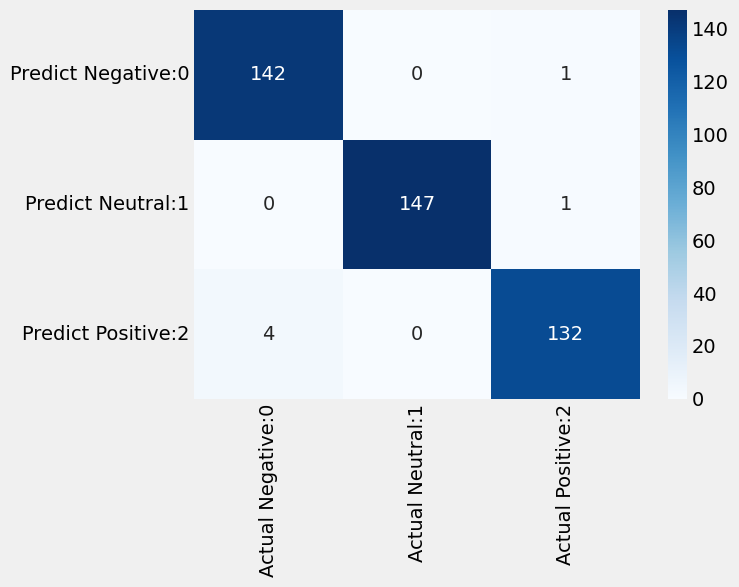

In [209]:
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data= cm, columns=['Actual Negative:0', 'Actual Neutral:1', 'Actual Positive:2'],
                                 index=['Predict Negative:0', 'Predict Neutral:1', 'Predict Positive:2'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')

In [210]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       143
           1       1.00      0.99      1.00       148
           2       0.99      0.97      0.98       136

    accuracy                           0.99       427
   macro avg       0.99      0.99      0.99       427
weighted avg       0.99      0.99      0.99       427



#Neural Network

In [211]:
import tensorflow as tf

In [212]:
data2.head()

# mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  mean_d_1_a  \
0        4.62      30.3    -356.0      15.6      26.3       1.070       0.411   
1       28.80      33.1      32.0      25.8      22.8       6.550       1.680   
2        8.90      29.4    -416.0      16.7      23.7      79.900       3.360   
3       14.90      31.6    -143.0      19.8      24.3      -0.584      -0.284   
4       28.30      31.3      45.2      27.3      24.5      34.800      -5.790   

   mean_d_2_a  mean_d_3_a  mean_d_4_a  mean_d_0_a2  mean_d_1_a2  mean_d_2_a2  \
0      -15.70        2.06        3.15         2.15         29.5       -353.0   
1        2.88        3.83       -4.82        25.60         32.8         29.6   
2       90.20       89.90        2.03         7.75         30.1       -441.0   
3        8.82        2.30       -1.97        17.30         32.0       -148.0   
4        3.06       41.40        5.52        26.10         34.3         43.7   

   mean_d_3_a2  mean_d_4_a2  mean_d_5_a  mean_d_6_a  mean_d_7_a  mean_d_8_a  \
0        14.40         21.5        5.98        30.7      -343.0        14.7   
1        21.50         17.4       25.50        31.7        31.5        26.2   
2         9.89         25.3      -68.90        25.3      -481.0       -65.4   
3        20.40         22.8       13.20        31.5      -147.0        16.9   
4        23.70         20.6       -3.87        34.1        43.7       -10.0   

   mean_d_9_a  mean_d_10_a  mean_d_11_a  mean_d_12_a  mean_d_13_a  \
0        27.9         3.17         32.2       -368.0         15.9   
1        32.9        31.80         33.1         33.2         28.5   
2        20.0        79.80         31.0       -408.0         91.9   
3        27.7        15.70         30.7       -142.0         20.7   
4        22.9        59.40         26.7         60.3         64.7   

   mean_d_14_a  mean_d_15_a  mean_d_16_a  mean_d_17_a  mean_d_18_a  \
0         36.4         7.08         28.8       -359.0         17.3   
1         26.8        32.40         34.7         33.8         27.0   
2         29.5        18.80         31.1       -335.0         32.2   
3         22.8        13.60         32.2       -135.0         21.2   
4         26.9        32.30         30.1         33.6         31.6   

   mean_d_19_a  mean_d_20_a  mean_d_21_a  mean_d_22_a  mean_d_23_a  \
0         19.6      -3.8300       -1.230    -10.80000       -0.363   
1         14.2       0.0342        1.100     -1.87000       -4.690   
2         19.9      76.6000        4.850     39.90000       75.300   
3         23.8       4.1500        0.556     -0.35400        3.460   
4         27.7      30.0000        0.276     -0.00677       33.700   

   mean_d_24_a  mean_d_25_a  mean_d_26_a  mean_d_27_a  mean_d_28_a  \
0        -6.41        -1.03       -2.780        14.60       -1.540   
1       -15.40        -6.22       -0.328        -3.53       -6.980   
2         5.27       -72.00       -0.843       -33.00      -82.000   
3        -4.96         1.63        1.330        -5.83       -0.298   
4        -2.36       -33.30        7.640       -16.60      -41.100   

   mean_d_29_a  mean_d_30_a  mean_d_31_a  mean_d_32_a  mean_d_33_a  \
0   -14.900000        -4.94        0.664         5.82       -2.920   
1    -9.370000        -6.85       -1.890        -4.13       -5.460   
2    -4.200000       -11.00       -0.972      -106.00      -22.300   
3     0.000777         3.71       -0.176       -12.10       -0.784   
4    -6.290000        -6.21        4.260        10.10       -7.930   

   mean_d_34_a  mean_d_35_a  mean_d_36_a  mean_d_37_a  mean_d_38_a  \
0         1.90         2.80       -1.550        25.50        -1.18   
1         3.20        -6.25       -1.430        -1.65        -2.28   
2         5.36      -149.00       -5.690       -72.90      -157.00   
3        -1.07        -2.52        0.771        -5.48        -3.75   
4        -7.14       -63.30        7.360       -16.60       -74.80   

   mean_d_39_a  mean_d_40_a  mean_d_41_a

In [213]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42)

In [214]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [216]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [217]:
# Compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [219]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=70, batch_size=32, verbose=2)

Epoch 1/70
43/43 - 0s - 7ms/step - accuracy: 0.9883 - loss: 0.0488 - val_accuracy: 0.9736 - val_loss: 0.1038
Epoch 2/70
43/43 - 0s - 5ms/step - accuracy: 0.9890 - loss: 0.0434 - val_accuracy: 0.9736 - val_loss: 0.0839
Epoch 3/70
43/43 - 0s - 6ms/step - accuracy: 0.9919 - loss: 0.0342 - val_accuracy: 0.9736 - val_loss: 0.0984
Epoch 4/70
43/43 - 0s - 5ms/step - accuracy: 0.9912 - loss: 0.0240 - val_accuracy: 0.9824 - val_loss: 0.0692
Epoch 5/70
43/43 - 0s - 5ms/step - accuracy: 0.9949 - loss: 0.0172 - val_accuracy: 0.9795 - val_loss: 0.1177
Epoch 6/70
43/43 - 0s - 4ms/step - accuracy: 0.9934 - loss: 0.0249 - val_accuracy: 0.9795 - val_loss: 0.0980
Epoch 7/70
43/43 - 0s - 4ms/step - accuracy: 0.9963 - loss: 0.0110 - val_accuracy: 0.9795 - val_loss: 0.0914
Epoch 8/70
43/43 - 0s - 7ms/step - accuracy: 0.9927 - loss: 0.0298 - val_accuracy: 0.9765 - val_loss: 0.1057
Epoch 9/70
43/43 - 0s - 8ms/step - accuracy: 0.9934 - loss: 0.0257 - val_accuracy: 0.9824 - val_loss: 0.0707
Epoch 10/70
43/43 -

In [221]:
model_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.4f}%".format(model_acc * 100))

Test Accuracy: 98.8290%


In [222]:
y_pred = np.argmax(model.predict(X_test), axis=-1)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [227]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[142   0   1]
 [  0 146   2]
 [  2   0 134]]


<Axes: >

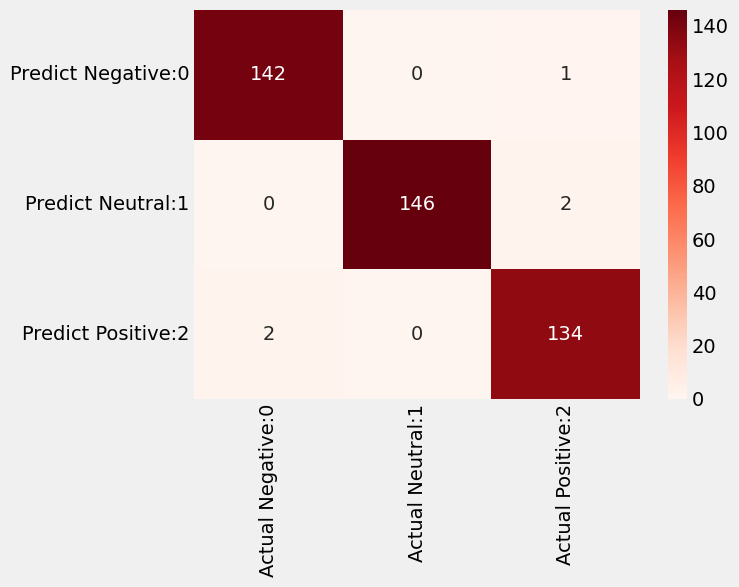

In [228]:
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data= cm, columns=['Actual Negative:0', 'Actual Neutral:1', 'Actual Positive:2'],
                                 index=['Predict Negative:0', 'Predict Neutral:1', 'Predict Positive:2'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Reds')

In [229]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       143
           1       1.00      0.99      0.99       148
           2       0.98      0.99      0.98       136

    accuracy                           0.99       427
   macro avg       0.99      0.99      0.99       427
weighted avg       0.99      0.99      0.99       427

